# g4Fire Data Validation

### Omar Moreno, SLAC National Accelerator Laboratory

The following notebook is used to check the hdf5 file structure output by `g4fire`. It also shows how to access the data using `h5py` and make plots using `matplotlib`. 


In [1]:
import h5py
import numpy as np

In [2]:
def errors(values): 
    
    err = [np.sqrt(x) for x in values]
    errmin = []
    errmax = []
    for x,err in zip(values,err):
        errmin.append(x-err/2)
        errmax.append(x+err/2)

    return errmin, errmax

def draw_histogram1D(ax, var, xmin, xmax, bins, **kargs): 
    
    bins = np.linspace(xmin, xmax, bins)
    values, xedges = np.histogram(var, bins=bins)
    bin_centers = (xedges + (xedges[1] - xedges[0])/2)[:-1]
    
    err_min = np.zeros(len(values))
    err_max = np.zeros(len(values))
    if 'errors' in kargs: 
        err_min, err_max = errors(values)
        
    if 'norm' in kargs:
        if kargs['norm'] == 1:
            integral = np.sum(values)
        else: 
            integral = kargs['norm']
            ax.set_ylabel('Event Fraction')
            
        values = values/integral
        
        if 'errors' in kargs: 
            err_min = np.array(err_min)/integral
            err_max = np.array(err_max)/integral
    
    if 'x_label' in kargs: 
        ax.set_xlabel(kargs['x_label'], fontsize=30)
        
    if 'y_label' in kargs: 
        ax.set_ylabel(kargs['y_label'], fontsize=30)
    
    color = 'blue'
    if 'color' in kargs:
        color = kargs['color']

    edgecolor = 'blue'
    if 'edgecolor' in kargs: 
        edgecolor = kargs['edgecolor']
    
    label = ''
    if 'label' in kargs: 
        label = kargs['label']
    
    matplotlib.rcParams.update({'font.size': 22})
    
    ax.hist(bin_centers, bins=xedges, weights=values, alpha=0.3, 
            linewidth=2, color=color, edgecolor=edgecolor, label=label )
    
    ax.minorticks_on()
    ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
    ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)

    ax.set_title('LDMX Simulation Internal', x=.75, fontweight='bold')

    return values, bin_centers

In [3]:
f = h5py.File('test.hd5', 'r')

## Event Header

In [4]:
header = f['events/EventHeader']
for param in header: 
    if len(header[param]) == 1:
        for jparam in header[param]:
            print('%s : %s' % (param, np.array(header[param][jparam])[0]))
    else: 
        print('%s : %s' % (param, np.array(header[param])[:5]))

isRealData : [0 0 0 0 0]
number : [1 2 3 4 5]
parameters : b'JamesRandom-begin\nUvec\n2226355706\n1068913630\n0\n1071680933\n536870912\n1072310831\n1073741824\n1072595532\n2684354560\n1071755687\n3221225472\n1071822771\n536870912\n1071081282\n0\n1069933394\n2147483648\n1071482173\n0\n1070597987\n0\n1072312550\n2684354560\n1071827751\n1610612736\n1071191496\n3221225472\n1068446946\n0\n1069945361\n2147483648\n1069417440\n0\n1070505798\n2147483648\n1072240443\n3221225472\n1072492640\n3221225472\n1068713827\n0\n1065473368\n0\n1072266667\n3758096384\n1068551838\n0\n1072508726\n3221225472\n1071852308\n536870912\n1066704328\n0\n1065422656\n0\n1072653402\n3758096384\n1070955813\n1073741824\n1071727872\n0\n1072512097\n3758096384\n1070865447\n3221225472\n1071806147\n2684354560\n1068097072\n0\n1071772936\n3221225472\n1072572409\n2147483648\n1072505471\n0\n1072335214\n3221225472\n1071880713\n2147483648\n1068961734\n0\n1071976507\n2147483648\n1071704821\n0\n1072336562\n2684354560\n1071884086\n0\n10

## Run Header

In [5]:
run = f['runs']
for param in run: 
    if len(run[param]) == 1:
        print('%s : %s' % (param, run[param][0]))
    else:
        for jparam in run[param]:
            if len(run[param][jparam]) == 1:
                print('%s/%s: %s' % (param, jparam, run[param][jparam][0]))

description : b''
detectorName : b''
end : 1648055066
number : -1
parameters/Compress calorimeter hit contribs: 1
parameters/Description: b'basic sim'
parameters/Detector Name: b''
parameters/Geant4 revision: b'1872bb216de7ffc09f9ddc5f8ffb2059dd52d795'
parameters/Gen 1 Class: b'g4fire::ParticleGun'
parameters/Gen 1 Direction X: 0.0
parameters/Gen 1 Direction Y: 0.0
parameters/Gen 1 Direction Z: 1.0
parameters/Gen 1 Energy [GeV]: 4.0
parameters/Gen 1 Particle: b'e-'
parameters/Gen 1 Position [mm] X: 0.0
parameters/Gen 1 Position [mm] Y: 0.0
parameters/Gen 1 Position [mm] Z: -1.2
parameters/Gen 1 Time [ns]: 0.0
parameters/Included scoring planes: 0
parameters/RandomNumberRootSeed: -1
parameters/Save calorimeter hit contribs: 1
softwareTag : b'5f3833c44f117344a19f0dd228cb407f969ec70b'
start : 1648055066


## SimParticles

In [6]:
keys = np.array(f['events']['sim']['SimParticles']['keys'])
size = np.array(f['events']['sim']['SimParticles']['size'])
vals = f['events']['sim']['SimParticles']['vals']

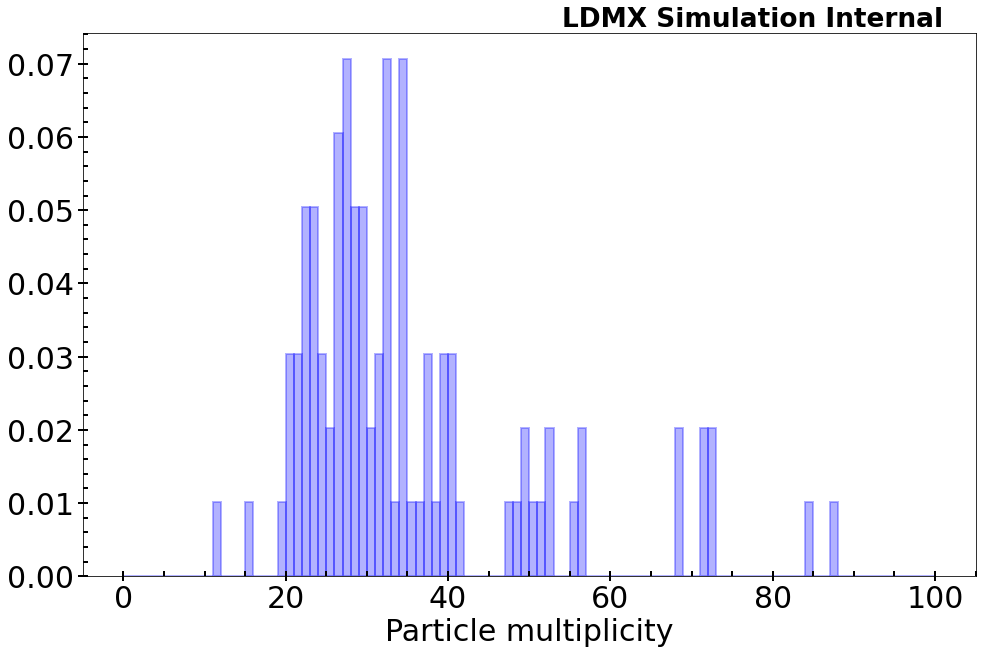

In [7]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, size, 0, 100, 101, 
                 x_label='Particle multiplicity', norm=1);

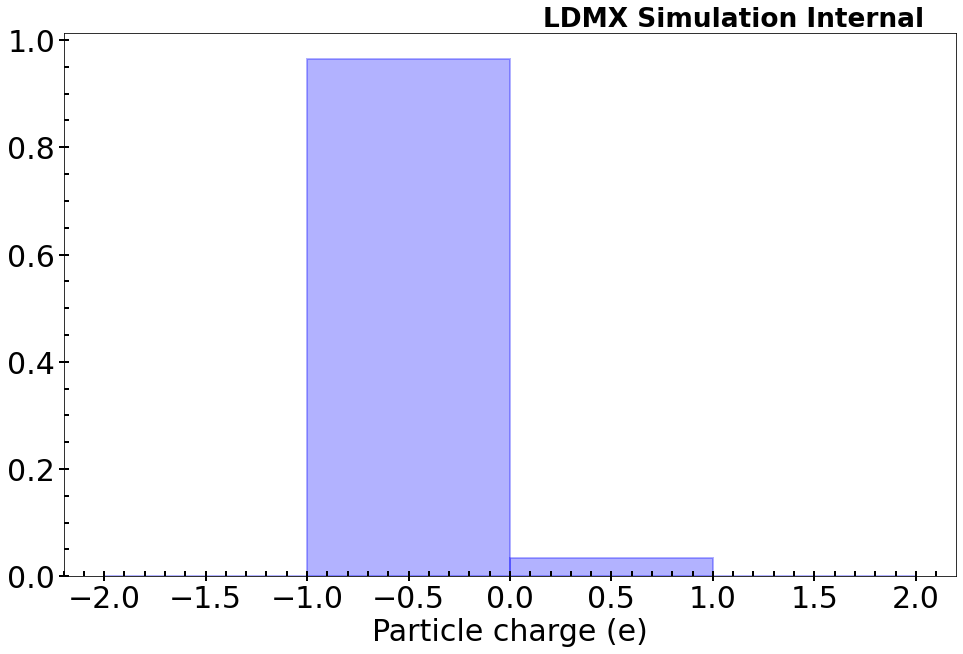

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['charge'], -2, 2, 5, 
                 x_label='Particle charge (e)', norm=1);

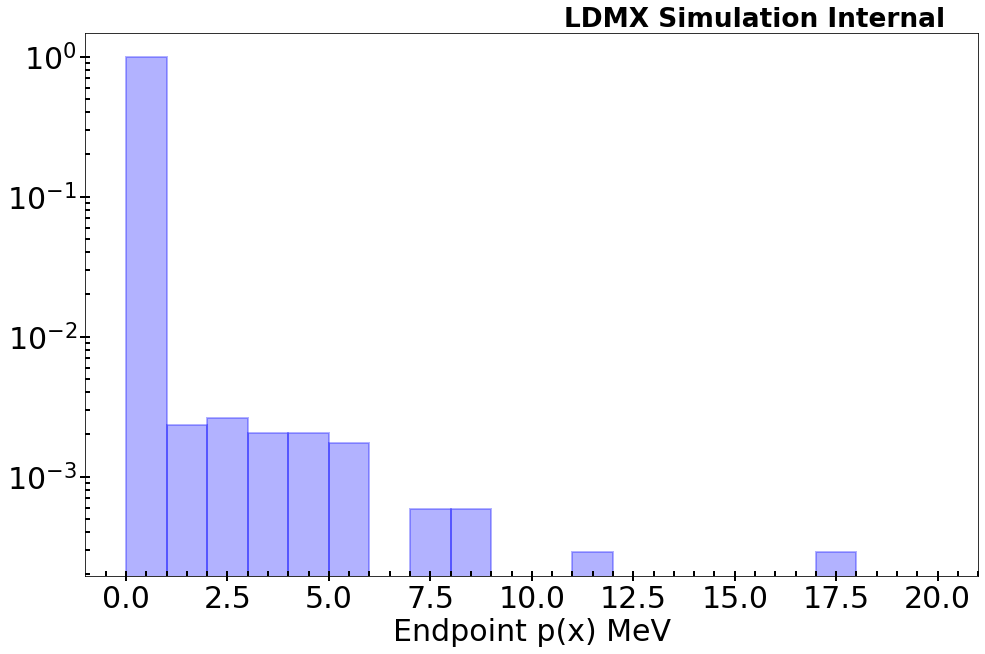

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['endpx'], 0, 20, 21, 
                 x_label='Endpoint p(x) MeV', norm=1);
ax.set_yscale('log')

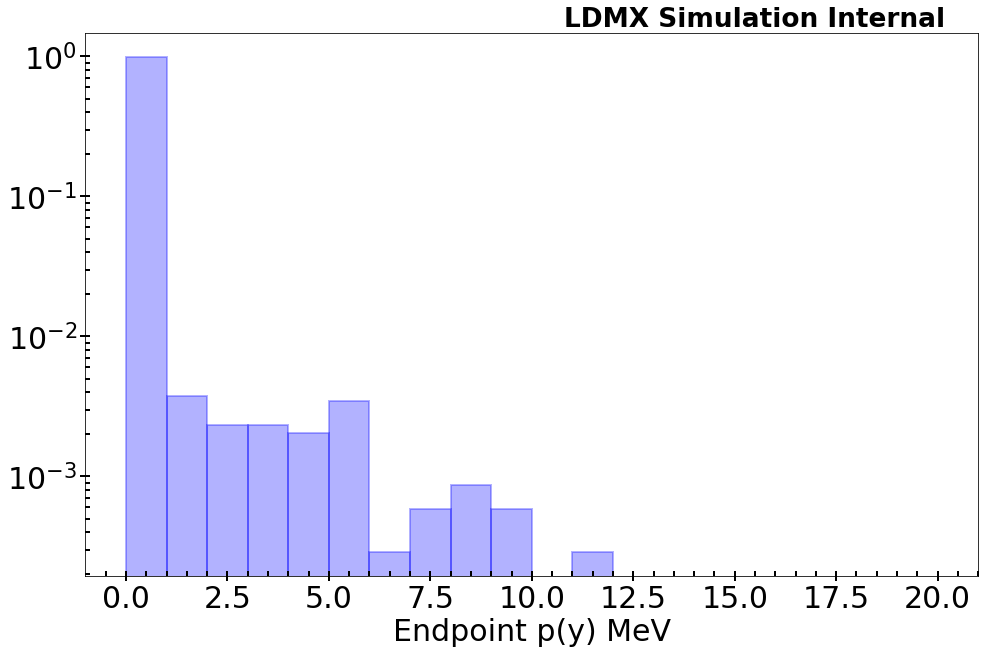

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['endpy'], 0, 20, 21, 
                 x_label='Endpoint p(y) MeV', norm=1);
ax.set_yscale('log')

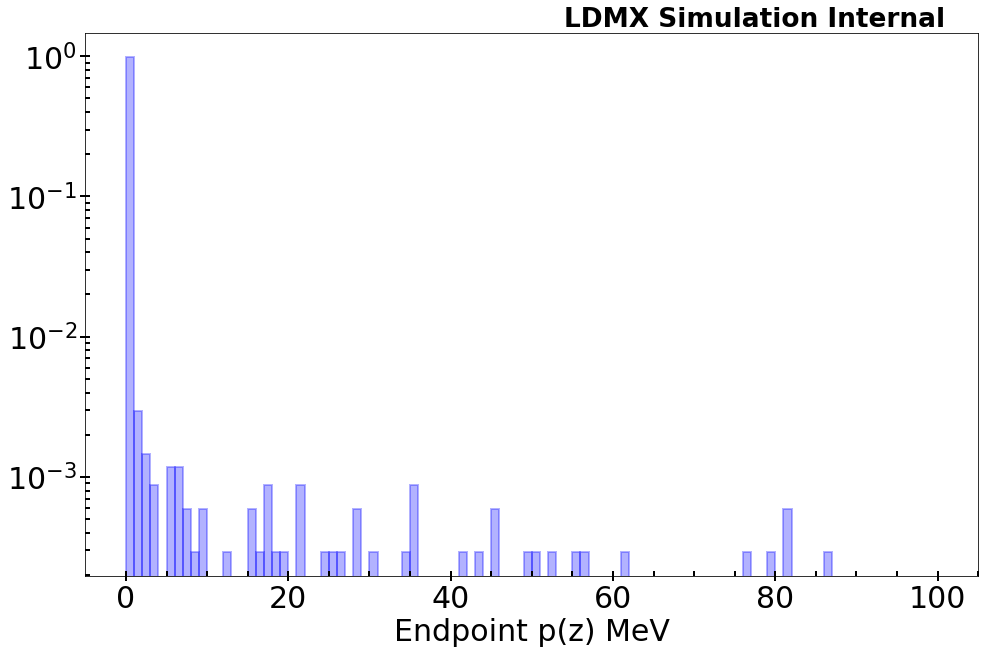

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['endpz'], 0, 100, 101, 
                 x_label='Endpoint p(z) MeV', norm=1);
ax.set_yscale('log')

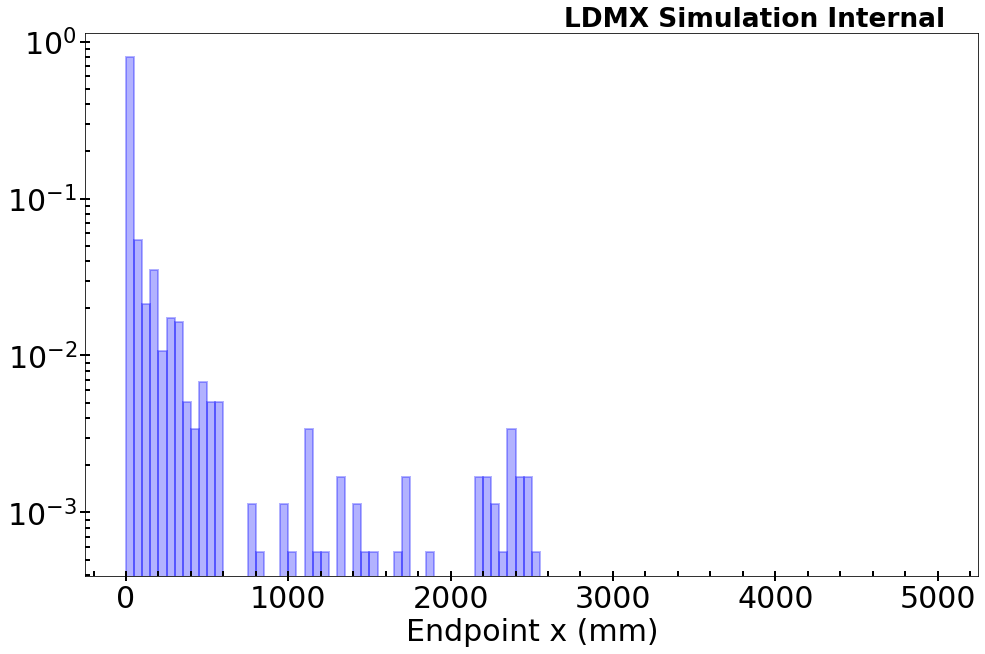

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['endx'], 0, 5000, 101, 
                 x_label='Endpoint x (mm)', norm=1);
ax.set_yscale('log')

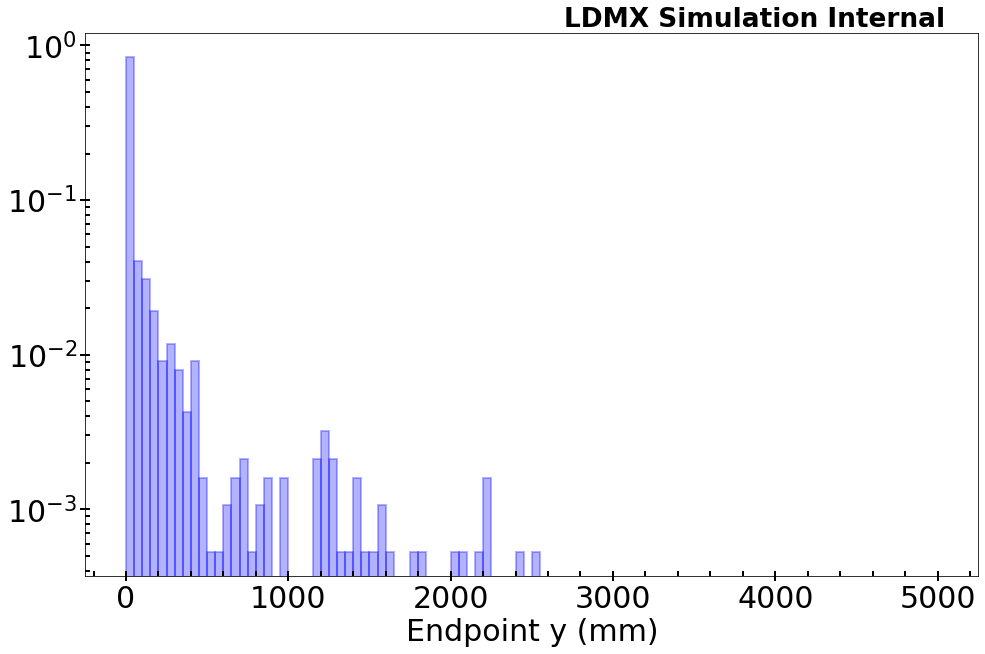

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['endy'], 0, 5000, 101, 
                 x_label='Endpoint y (mm)', norm=1);
ax.set_yscale('log')

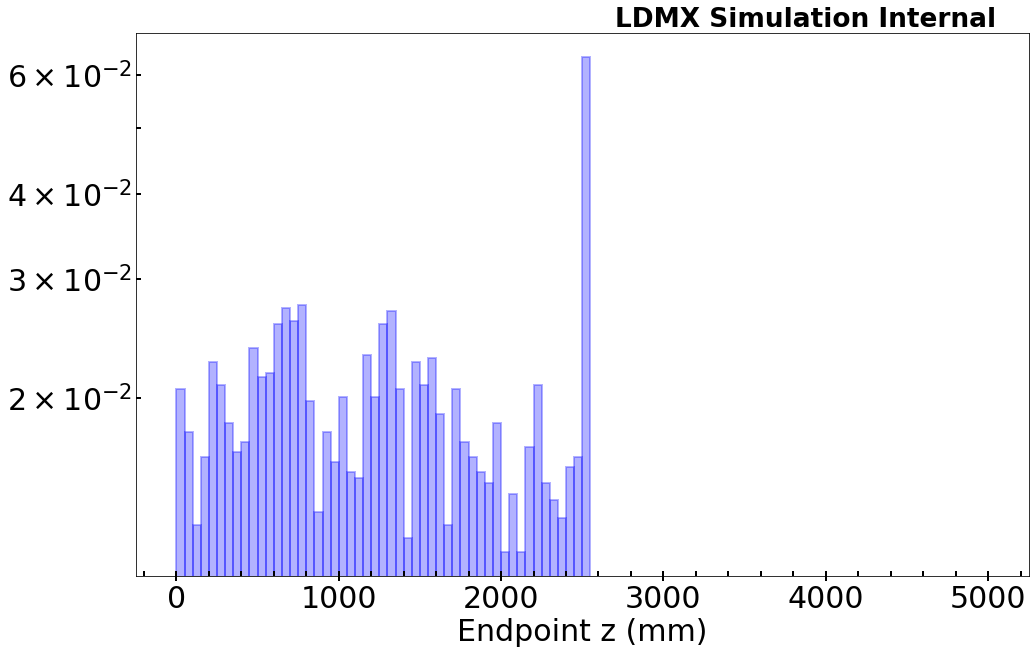

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['endz'], 0, 5000, 101, 
                 x_label='Endpoint z (mm)', norm=1);
ax.set_yscale('log')

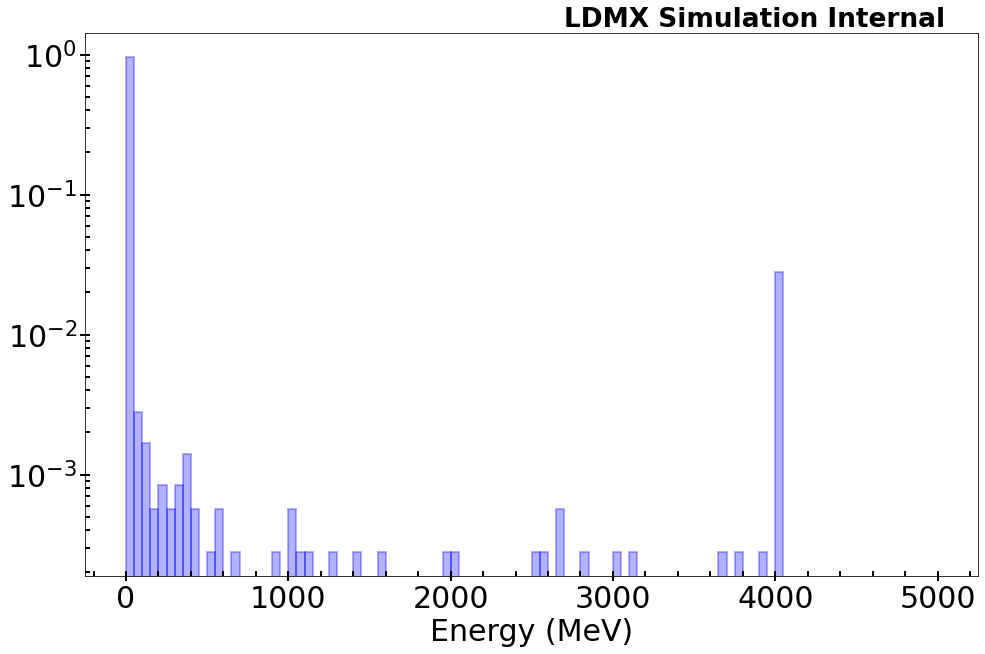

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['energy'], 0, 5000, 101, 
                 x_label='Energy (MeV)', norm=1);
ax.set_yscale('log')

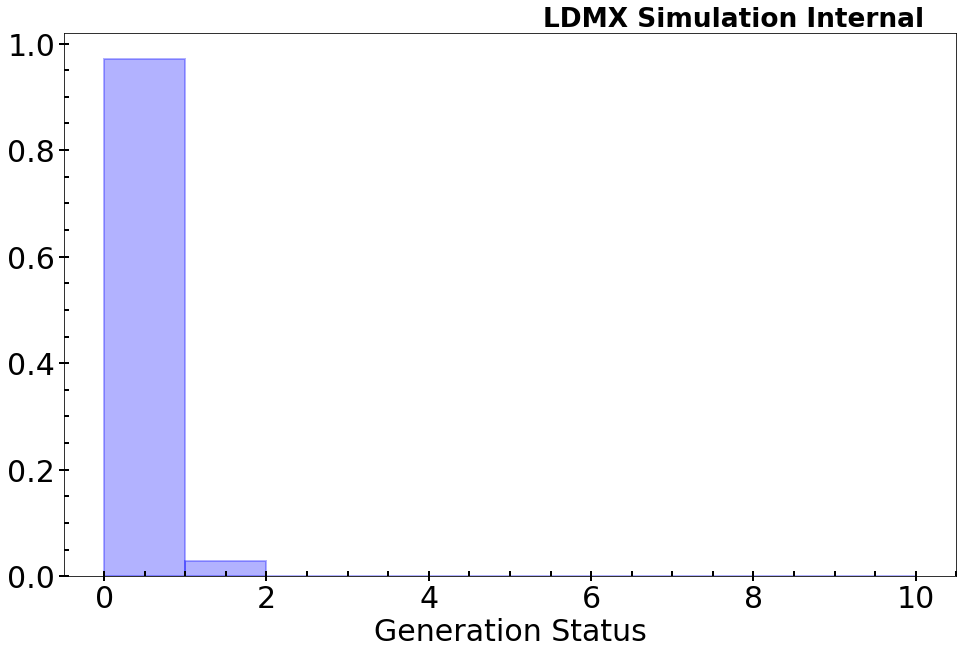

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['gen_status'], 0, 10, 11, 
                 x_label='Generation Status', norm=1);

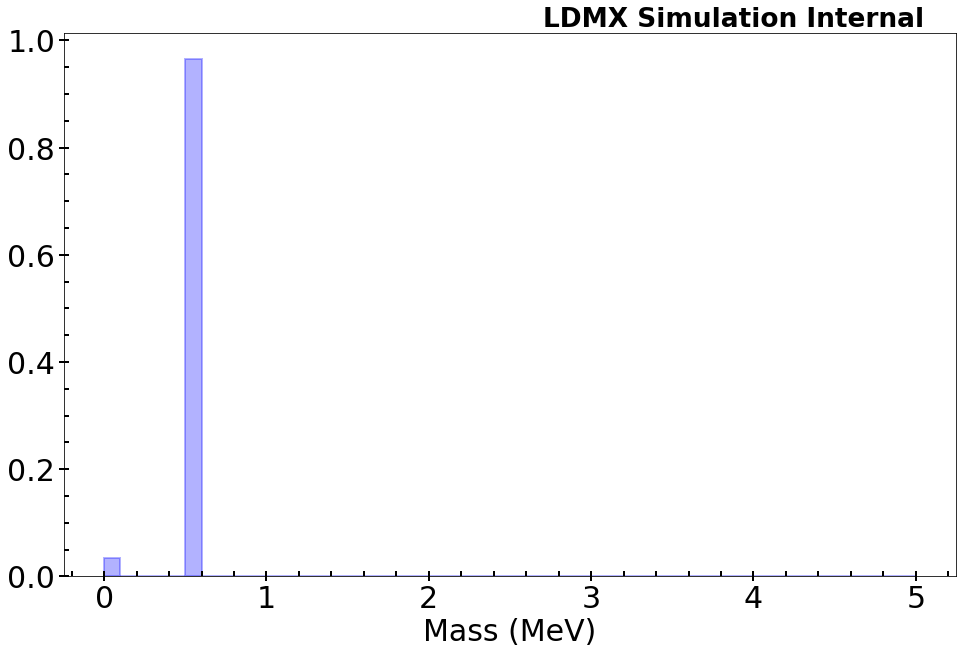

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['mass'], 0, 5, 51, 
                 x_label='Mass (MeV)', norm=1);

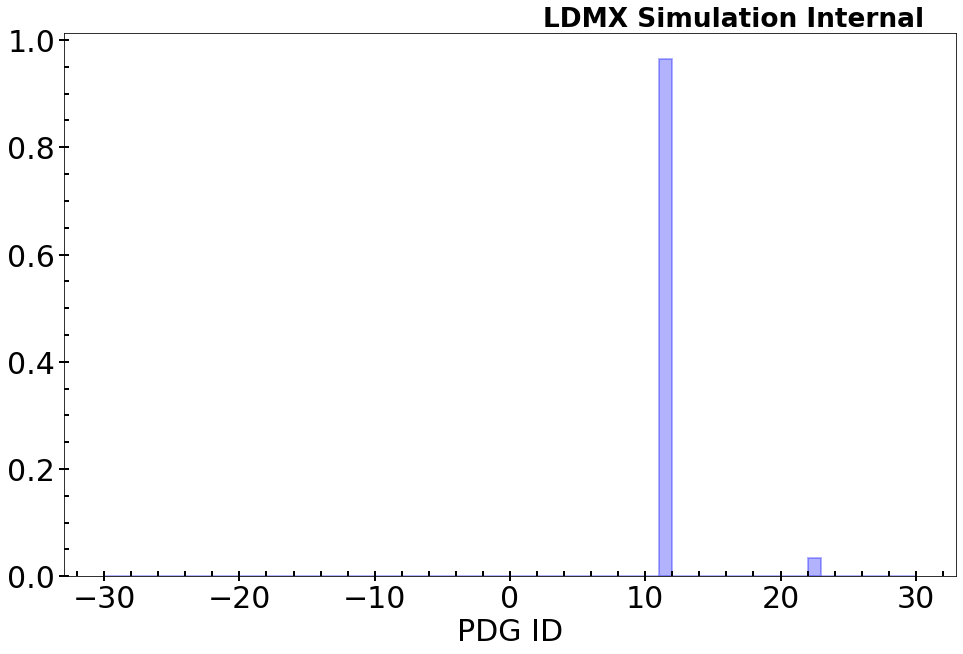

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['pdg_id'], -30, 30, 61, 
                 x_label='PDG ID', norm=1);

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['px'], -10, 10, 101, 
                 x_label='p(x) MeV', norm=1);
ax.set_yscale('log')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['py'], -10, 10, 101, 
                 x_label='p(y) MeV', norm=1);
ax.set_yscale('log')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['pz'], -100, 4500, 101, 
                 x_label='p(z) MeV', norm=1);
ax.set_yscale('log')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['time'], 0, 40, 41, 
                 x_label='Time (ns)', norm=1);

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['x'], -50, 50, 101, 
                 x_label='x (mm)', norm=1);

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['y'], -50, 50, 101, 
                 x_label='y (mm)', norm=1);

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, vals['z'], -50, 50, 101, 
                 x_label='z (mm)', norm=1);

In [ ]:
print(np.unique(np.array(vals['vertex_vol'])))